<a href="https://colab.research.google.com/github/roxyconstantine-dev/Analisis-de-datos-Precio-de-Diamante/blob/main/Proyecto_Final_Roxana_de_la_Caridad_Constantin_Esparraguera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Proyecto Final de Curso de Analisis de Datos con Python ***




*   Estudinate:Roxana de la Caridad Constantin Esparraguera(Posgrado)
*   Tema:Predición del precio del diamante segun sus criterios de evaluación 








In [1]:
%%html
<iframe src="https://www.goldandtime.org/fotos/editor/83635/tasacion20diamantes2022.jpg" width="500" height="500"></iframe>


Importando librerias

In [2]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

from itertools import cycle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LogNorm
import seaborn as sns
import pydotplus
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from IPython.display import Image  

In [ ]:
#Importabdo los datos

In [3]:
url = 'https://github.com/herrmilt/ADwithPythonCourse/blob/main/actividades/data/diamonds.csv?raw=true'
df = pd.read_csv(url)
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Datos**
*   Table:Amplitud de la vista superior de un diamante
*   Carat:Peso
*   Cut:Corte
*   Color:Color, desde la E a la J
*   Clarity:Claridad, cuanta luz pasa por el diamante.Está definido por las marcas
*   Depth:Profundidad, es la medida complementaria al table.La altura del diamante
*   Price:Precio
*   x:Amplitud x
*   y:Amplitud y
*   z:Amplitud z











El peso de un diamante se mide en quilates (1 qt = 0,20 gramos), y es el factor más determinante para estimar el precio de un diamante. Los dos conceptos claves a tener en cuenta respecto al precio son:

 El precio de los diamantes aumenta exponencialmente respecto al peso, así un diamante de un quilate no vale el doble que un diamante de medio quilate sino aproximadamente el cuádruple.

La cotización de los diamantes se determina por bloques, por lo que un diamante de 0,49 quilates pese a ser visualmente casi idéntico a uno de 0,50 quilates será más barato, al pertenecer al bloque de cotización 0,40 - 0,49 quilates en vez de al de 0,50 - 0,59 quilates.

Cuanto más puro es un diamante, más cantidad de luz recibe y refleja, produciendo una mayor cantidad de brillo que los diamantes de menor pureza.
El grado de pureza de un diamante se determina según el número, tamaño y posición de sus marcas externas e inclusiones, usando una lupa de 10 aumentos (10X), y la escala de pureza más usada, del laboratorio gemológico G.I.A., se divide en 11 grados que van, desde el mayor grado de pureza (FL o Flawless) al grado I (inclusiones visibles a simple vista, también denominado piqué).

El color de un diamante influye enormemente en la belleza y en el precio del mismo. Cuanto más incoloro, mejor calidad.
Esta escala ordena el color de los diamantes por orden alfabético desde la letra D (incoloro perfecto), hasta la Z (amarillo o marrón).(En los dato solo llega hasta la J)

La talla influye en el precio,este es un aspecto clave, para tener un diamante que brille y no siempre se le presta la suficiente atención. Diamantes con buena simetría y proporcionados siempre reflejarán mejor la luz y brillarán mucho más. La escala que se utiliza hoy en día incluye los siguientes grados: Excellent, Very Good, Good, Fair y Poor. Siendo en general los diamantes Excellent y Very Good los que deberíamos comprar para tener una piedra con una buena reflexión.


Analizando los datos:

En los datos se poeen 3 variables culitativas:cut(corte),color,clarity(ilimunación) y el resto de 7 variables son cuantitativas:


In [ ]:
%%html
<iframe src="https://www.goldandtime.org/fotos/editor/83635/cs20diamantes.jpg" width="700" height="600"></iframe>



In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<ipython-input-5-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


Tenemos los datos cualitativos de tipo objet que es el equivalente a un string en un dataframe y el resto de datos (excepto el precio que esta en int64) estab en float64.No tengo datos faltantes y todos las variables de una misma columna tienen igual clasificación.

La variable objetivo es el precio que es la que se procede a estimar y el resto son las que usaremos para entrenar el modelo.

**Comportamiento de las variables cuantitativas en un histograma**

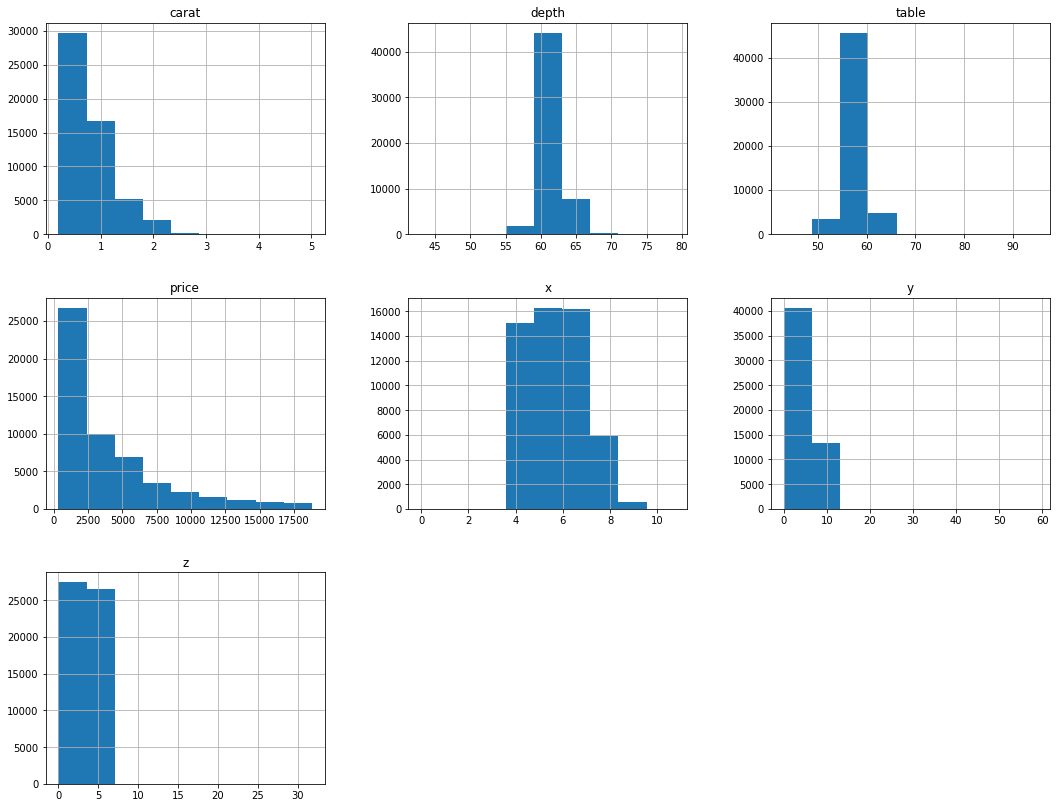

In [6]:
df.hist(bins=9,figsize=(18,14),grid=True);

**Valor de la correlación entre variables numéricas**

In [7]:
# correlation
pd.set_option('precision', 2)
df.corr(method='pearson')

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00




*   Se procede a codificar las variables que con cualitativas haciendo uso de map y un diccionario  y tratar de que dicha codificación coincida de manera numeral con la clasificación , de manera que a caracteristicas positivas le correspondan números más grandes.



In [8]:
df.groupby(['color']).count()  

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808


In [9]:
df.groupby(['cut']).count()  

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [10]:

df.groupby(['clarity']).count()  

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
I1,741,741,741,741,741,741,741,741,741
IF,1790,1790,1790,1790,1790,1790,1790,1790,1790
SI1,13065,13065,13065,13065,13065,13065,13065,13065,13065
SI2,9194,9194,9194,9194,9194,9194,9194,9194,9194
VS1,8171,8171,8171,8171,8171,8171,8171,8171,8171
VS2,12258,12258,12258,12258,12258,12258,12258,12258,12258
VVS1,3655,3655,3655,3655,3655,3655,3655,3655,3655
VVS2,5066,5066,5066,5066,5066,5066,5066,5066,5066


In [11]:
#Codificando los colores
MAPEO = {'D':0,'E':1, 'F':2,'G':3,'H':4 ,'I':5,'J':6}
Y=df['color']
Y=Y.map(MAPEO)
df['color']=Y
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
#Codificando corte
MAPEO = {'Fair':0, 'Good': 1, 'Ideal': 2,'Premium':4, 'Very Good': 3}
Y=df['cut']
Y=Y.map(MAPEO)
df['cut']=Y
df



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
#Codificando imperfecciones
MAPEO = {'I1':0,'IF': 1	,'SI1': 2,'SI2': 3, 'VS1': 4, 'VS2': 5 ,'VVS1': 6	,'VVS2':7}
Y=df['clarity']
Y=Y.map(MAPEO)
df['clarity']=Y
df

	

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,4,3,61.0,58.0,2757,6.15,6.12,3.74


## Observación del comportamiento de las variables 

Por la descripcion de las caracteristicas de los diamantes el peso es una de las variables con más importancia,por lo tanto es importante conocer si su comportamiento es relativamente condescenciente.

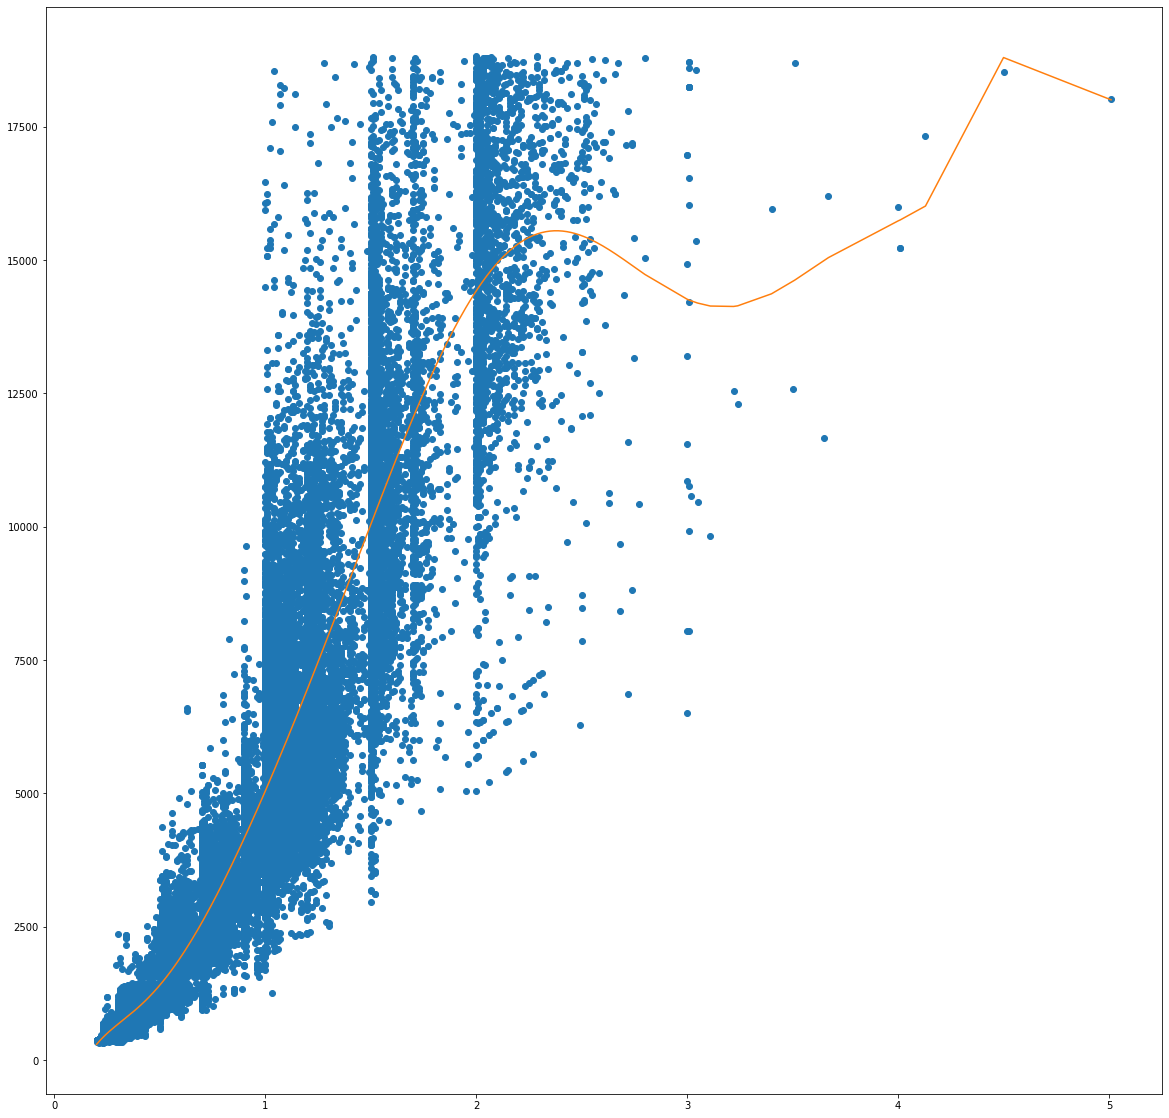

In [14]:

#Precio respecto al peso estimado con polinomio de grado 10
import matplotlib
import matplotlib.pyplot as plt
condicionM = df['price']
plt.figure(figsize=(20, 20))
x= df['carat']
y = condicionM
plt.plot(x, y,'o')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,10))(np.unique(x)))
 # plt.xlabel(col)
 # plt.ylabel('  ')

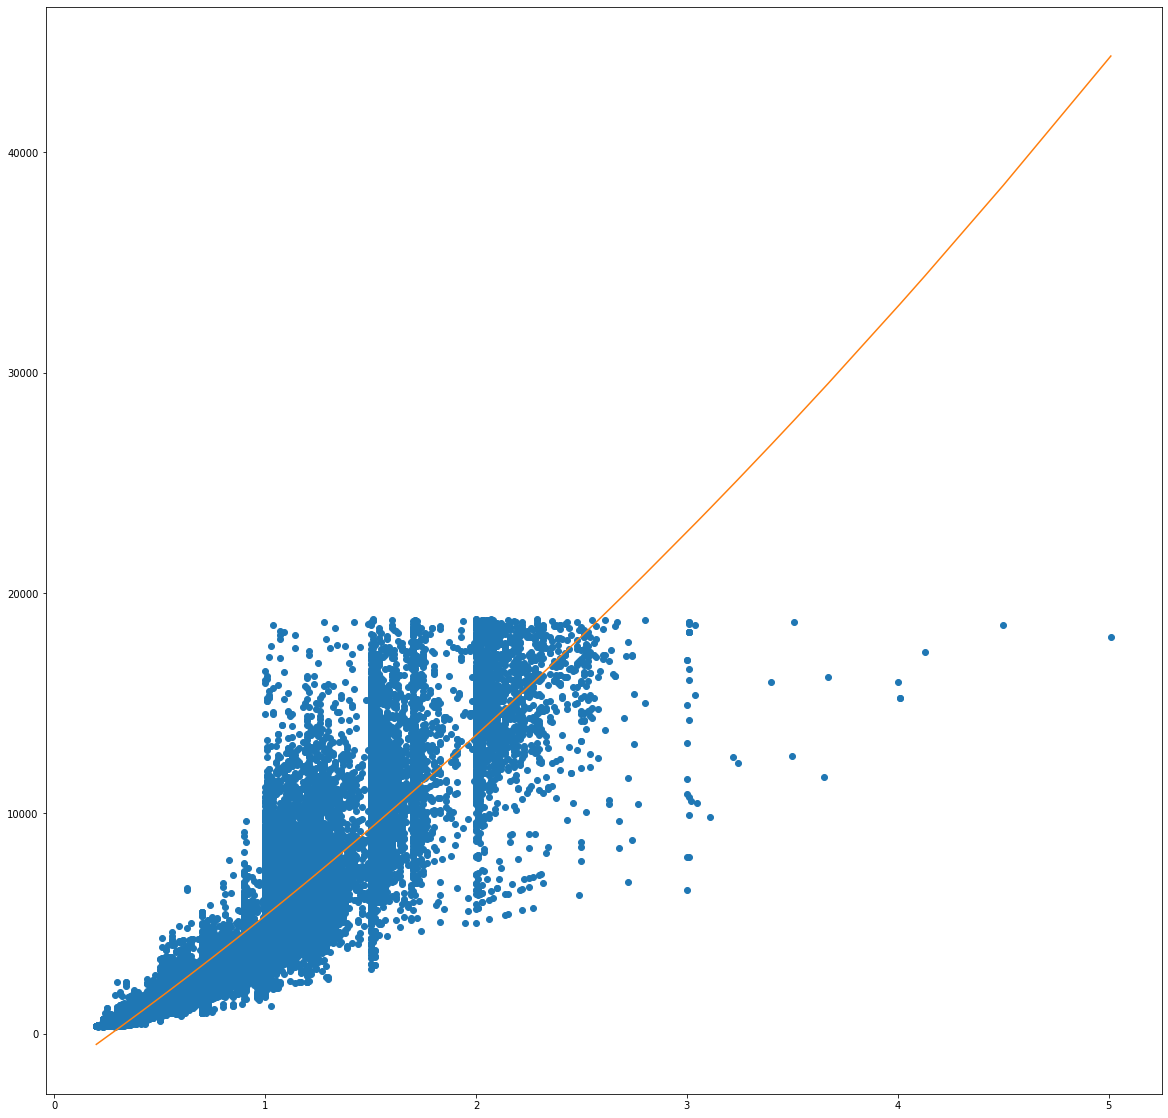

In [ ]:
#Precio respecto al peso estimado con polinomio de grado 2
import matplotlib
import matplotlib.pyplot as plt
condicionM = df['price']
plt.figure(figsize=(20, 20))
x= df['carat']
y = condicionM
plt.plot(x, y,'o')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,2))(np.unique(x)))
 # plt.xlabel(col)
 # plt.ylabel('  ')

Con 1 solo grado ya la grafica expone un comportamiento deseable, al aumnetar los grados del polinomio se ajusta más pero con 2 ya es bastante aceptable

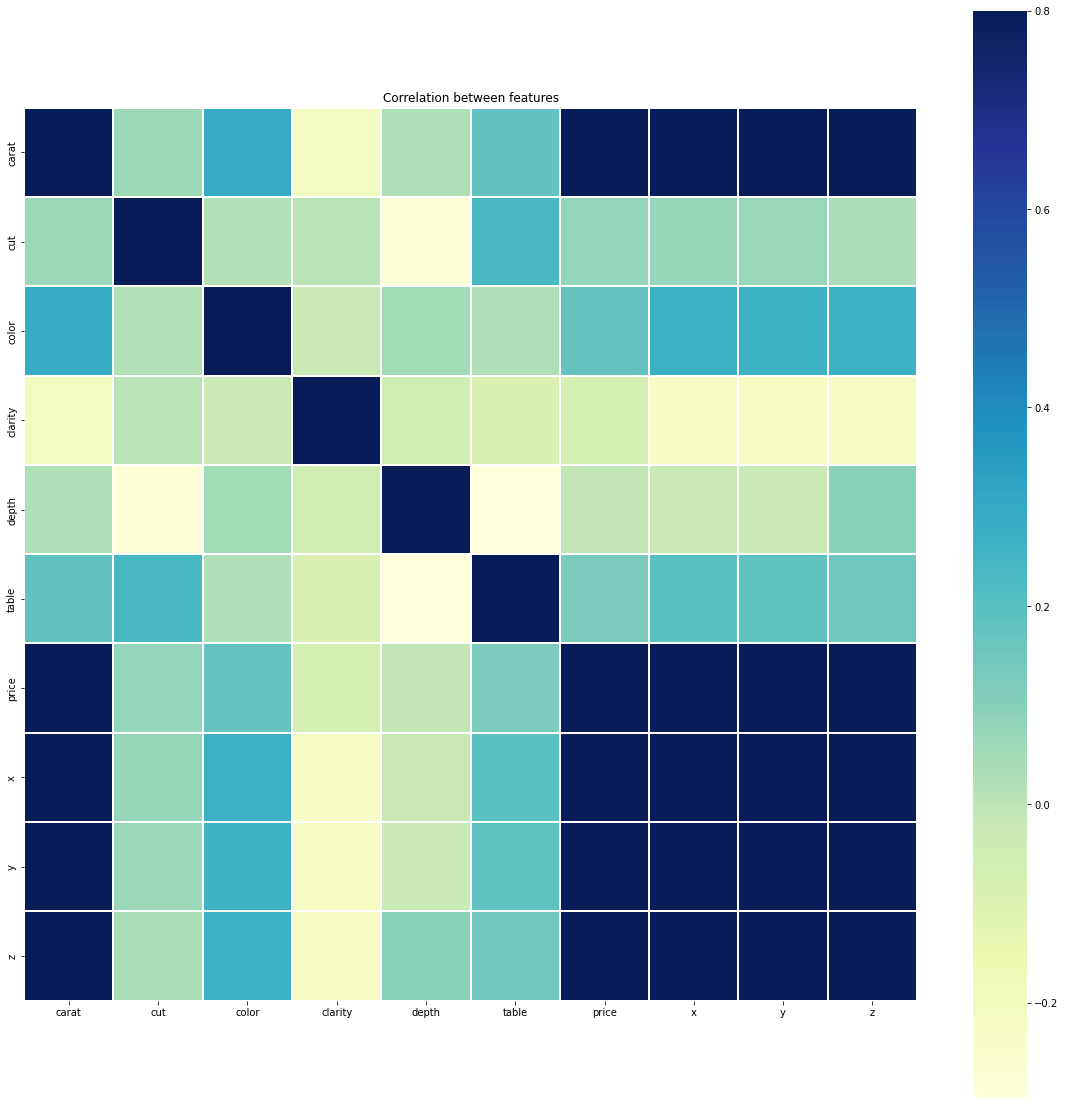

In [ ]:
corr=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

**Graficado de cada una de las variables y su comportamiento respecto al precio**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


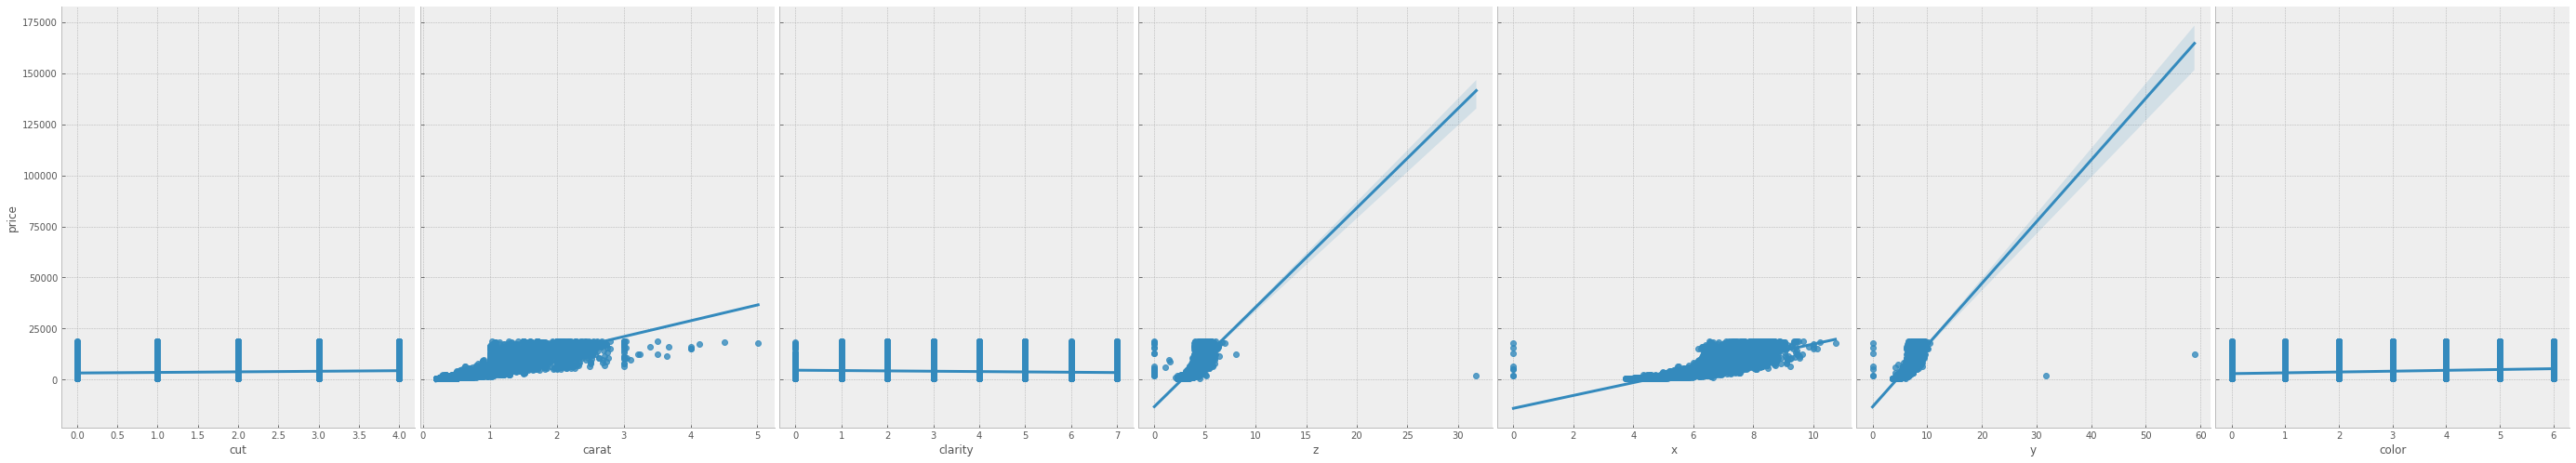

In [ ]:
sns.pairplot(df, x_vars=['cut','carat','clarity', 'z','x','y','color'], y_vars='price', size=7, aspect=0.8,kind = 'reg')

Vamos a realizar un algoritmo para detectar cuales son las variables más influyentes basado en su varianza

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

y=df['price']
X=df.drop(['price'], axis=1)
best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
used_features =X.columns[selected]
print(X.columns[selected])


Index(['carat', 'x', 'z'], dtype='object')


In [ ]:
"""
Index(['carat', 'x', 'z'], dtype='object')
"""

Vamos a comparar cual de todos los metodos de correlación es el mas adecuado y cual genera menos error.

In [16]:
X = df[['carat', 'x', 'z']]
y = df[["price"]]
validation_size = 0.20
seed = 0
models = []
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
X = df[['carat', 'x', 'z']]
y = df[["price"]]
validation_size = 0.20
seed = 0
models = []
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVR', SVR()))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('GPR', GaussianProcessRegressor(random_state=seed)))

#from pycaret.classification import *
#clf1 = setup(data = df, target = 'Survived', train_size = 0.7, data_split_shuffle=True, session_id = 2)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
score = 'r2'
#best=compare_models()
num_folds =5
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.852029 (0.005132)
LASSO: 0.852121 (0.004955)
EN: 0.760885 (0.004326)
KNN: 0.856765 (0.001602)
CART: 0.776213 (0.005057)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
"""
Ajuste segun el metodo 

LR(Regresión Lineal): 0.852029 (0.005132)
LASSO: 0.852121 (0.004955)
EN: 0.760885 (0.004326)
KNN: 0.856765 (0.001602)
CART: 0.776213 (0.005057)
SVR: 0.621876 (0.002794)
RIDGE: 0.852041 (0.005107)
RIDGECV: 0.852002 (0.005010)
MLPR: 0.859734 (0.003513)
"""

'\nLR: 0.852029 (0.005132)\nLASSO: 0.852121 (0.004955)\nEN: 0.760885 (0.004326)\nKNN: 0.856765 (0.001602)\nCART: 0.776213 (0.005057)\nSVR: 0.621876 (0.002794)\nRIDGE: 0.852041 (0.005107)\nRIDGECV: 0.852002 (0.005010)\nMLPR: 0.859734 (0.003513)\n'

Normalizando para que la predición sea mejor

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)




# ***Red Neuronal (Keras Regression)*** 

Se procede con una red neuronal al ser este fue no de los métodos que estimó un mejor ajuste.

In [21]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))
  

Le decimos a Keras que queremos usar para entrenar el dataset usando batches bloques de 10 (reduciendo la necesidad de memoria) y daremos 10 vueltas completas (o epochs). Usaremos los datos para validar seran X_validation y Y_validation. El proceso de entrenamiento lo iremos viendo a continuación hasta terminar. El resultado se guara en history :

In [22]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
model.summary()

# Fit the model
early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)
history =  model.fit(X_train, 
                     Y_train, 
                     epochs=10, 
                     batch_size=10, 
                     verbose=0, 
                     validation_data=(X_validation, Y_validation),) 
#                    callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                52        
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [25]:
scores = model.evaluate(X_validation, Y_validation, verbose=1)
print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))

338/338 [==============================] - 2s 6ms/step - loss: 15856529.0000 - coeff_determination: -0.0442
loss: 15856529.0000%
coeff_determination: -0.0442%


In [26]:
hist_df = pd.DataFrame(history.history)
hist_df.tail()

,loss,coeff_determination,val_loss,val_coeff_determination
5,1.59e+07,-0.34,1.60e+07,-0.47
6,1.59e+07,-0.35,1.59e+07,-0.31
7,1.59e+07,-0.35,1.59e+07,-0.35
8,1.60e+07,-0.34,1.59e+07,-0.38
9,1.59e+07,-0.53,1.59e+07,-0.36


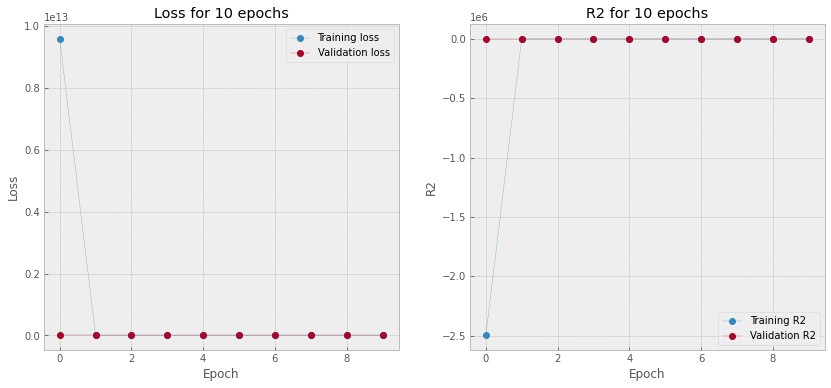

In [38]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.coeff_determination, label='Training R2', **params_dict)
plt.plot(hist_df.val_coeff_determination, label='Validation R2', **params_dict)
plt.title('R2 for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

Usando validación cruzada para evaluar el modelo y probar su rendimiento.

In [ ]:

# Using k-fold cross validation
i=1
cvscores0 = []
cvscores1 = []
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
for train, validation in kfold.split(X, y):
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[coeff_determination])
    # Fit the model
    model.fit(X_train, 
              Y_train, 
              epochs=150, 
              batch_size=20, 
              verbose=0, 
              validation_data=(X_validation, Y_validation),) 
              #callbacks=[early_stopping])
    # evaluate the model
    print('\nResults from #{} run...'.format(i))
    scores = model.evaluate(X_validation, Y_validation, verbose=1)
    print("%s: %.4f%%" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))
    cvscores0.append(scores[0])
    cvscores1.append(scores[1])
    i+=1
model.summary()
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores0), np.std(cvscores0)))
print("%.2f%% (+/- %.4f%%)" % (np.mean(cvscores1), np.std(cvscores1)))

Con 10 neuronas se ve que las gráficas no van a mejorar porque se están poniendo horizontales, lo que indica que aumentar mucho más las vueltas de entrenamiento no van a mejorar el aprendizaje. Si bien la curva ROC da una buena tasa de positivos reales contra falsos positivos (es decir, cuando especifica una clase, no suele dar un falso positivo), el nivel de acierto es muy bajo para el consumo de recursos en comparación con otros modelos.(Este modelo demoro en graficarse 8 minutos)




# **Regresión Lineal Múltiple ***

Uno de los modelos más usados pero que posee una gran precision para este conjunto de datos.

In [ ]:
modelo_rm = LinearRegression()
#Intercepto 
modelo_rm.fit(X_train,Y_train)
b0 = modelo_rm.intercept_
print (b0)

[1813.93329096]


In [ ]:
#Coeficientes del polinomio,tantos comovariables de entrada
print ("Coeficientes: b1, b2, b3") 
print (modelo_rm.coef_)

Coeficientes: b1, b2, b3
[[10148.79485062  -739.14725465  -492.92863011]]


In [ ]:
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
print (b1, b2, b3)

[10148.79485062] [-739.14725465] [-492.92863011] []


In [ ]:
#Ajuste
print(modelo_rm.score(X_train, Y_train))

0.8531506308845572


Es un coeficiente bastante aceptable,vamos a mirar como se ve 

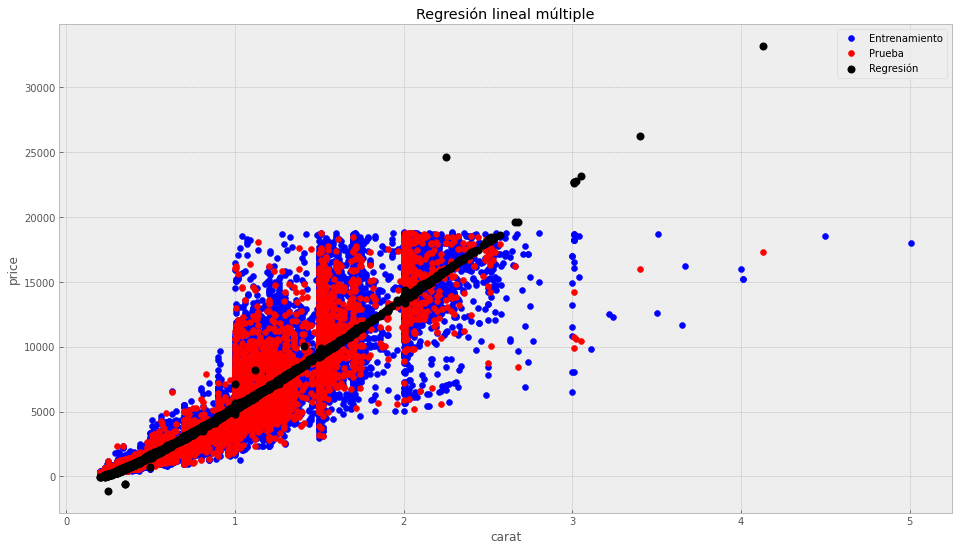

In [ ]:
"""
comparisons = pd.DataFrame(X_validation)
comparisons = comparisons.assign(Sales_Real = Y_validation)
comparisons = comparisons.assign(Predicted = predictions.flatten().tolist())
print(comparisons)

"""
y_pred = modelo_rm.predict(X_validation)

# Salida gráfica

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de entrenamiento
ax.scatter(X_train['carat'], Y_train , color='blue', label='Entrenamiento')

# Graficar los puntos de prueba
ax.scatter(X_validation['carat'], Y_validation, color='red', label='Prueba')

# Graficar la recta de regresión
ax.scatter(X_validation['carat'],y_pred, color='black', linewidth=2, label='Estimación con Regresión')

# Agregar etiquetas al eje X e Y 
ax.set_ylabel("price")
ax.set_xlabel("carat")

# Agregar un título al gráfico
ax.set_title("Regresión lineal múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


El comportamiento del modelo respecto a los datos de prueba es bastante aceptable.